# Gradient Descent

The goal of this notebook is to gain an intuitive understanding of gradient descent (GD). We will be roughly following along with the Gradient Descent chapter of *Data Science from Scratch* by Joel Grus; however, we will be tackling it with slighltly more mathematical formality. I do not wish to discuss the meaning of a derivative.

GD is an algorithm to minimize a function by iteritavely taking small steps in the opposite direction of the gradient of the function. Remembering vector calculus, the gradient of a function is in the direction of maximum increase of the function. The gradient of a function $f(x_1, x_2, ..., x_n)$ is as follows: $$\vec{\nabla}f(x_1, x_2, ..., x_n) = \sum_{i = 1}^{n} \hat{x}_i \frac{\partial f}{\partial x_i}, $$ where $\hat{x}_i$ denotes a unit vector in the direction of that particular coordinate. Let's start by writing an approximate algorithm to compute this.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import california_housing

C:\Users\cbrad\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.california_housing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# writing a gradient algorithm
def der(f,x,k,h):
    '''
    Computes the derivative in the k-th direction.
    '''
    small_change = [val + (h if index==k else 0) for index,val in enumerate(x)]
    a = f(x)
    b = f(small_change)
    return (b - a)/h

def grad(f,x,h = 0.01):
    '''
    Computes the gradient via a for loop.
    '''
    return [der(f,x,i,h) for i in range(len(x))]
def f(x):
    '''
    Just a random function to start off with. Note we
    are using a scalar function... We could compute the gradient of a vector function
    as wel.. another time. 
    '''
    return np.sum([np.sin(q**2) for q in x])

In [3]:
grad(f,[1,2,3,1,0,8])

[1.0689369475964217,
 -2.559569368171921,
 -5.547003376646842,
 1.0689369475964217,
 0.009999999983323349,
 5.070278199942724]

## An algorithm for GD

Now that we have a function that will compute the gradient, what do we do if we want to minimize a particular function $f(x_1, x_2, ..., x_n)$? We could, and will, compute the gradient of the function then take small steps in the negative direction of the gradient iteratively until we reach a local minimum! These step sizes are often called the *learning rate*. Picking a learning rate is not much of a science; too large a rate will cause your alogorithm to diverge and skip the minumum entirely, too small a rate will take too long to reach the minimum. There is also something to be said for functions with more than one minumum (and possibly no global minimum). For now let's start off with an easy example: the magnitude of a vector.

In [4]:
def GD_naiive(x,f,step):
    '''
    The actual GD step. The learning rate must be positive here since we 
    take into acount the direction in the function.
    '''
    if (step <= 0):
        print("Pick a positive-definite step")
        return 0
    else:
        gradient = grad(f,x)
        x_n = [old - (step*gradient[index]) for index, old in enumerate(x)]
        return x_n
def mag(x):
    '''
    Just the magnitude of a vector. 
    '''
    return np.sum([val**2 for val in x])

In [5]:
# great, let's test it out. We start from a random position and iterate many times to get a "minimum".
vec = np.random.uniform(-1,1,5)
for i in range(10**4):
    vec = GD_naiive(vec,mag,0.01)
vec

[-0.005000000000000022,
 -0.005000000000000022,
 -0.005000000000000022,
 -0.004999999999999978,
 -0.004999999999999978]

## Applying GD to Linear Regression
Check out this great [blog post](https://towardsdatascience.com/gradient-descent-from-scratch-e8b75fa986cc), I will be following it fairly closely.

We have seen how GD works in a first principles sense, but our goal is to become good Data Scientists. To do this we need to apply our knowledge to examples. Let's look at some basic linear regression. $$\hat{y} = mx + b$$ Linear regression is the act of fitting a line to data. An example of data with a linear relationship is the height of a person and pant sizes. The "fitting" part is the job of GD. The best fit line is one that minimizes the mean square error (MSE). The square error for a particular data point is $$SE_i = (y - y_i)^2,$$ where $y$ is the true value of the parameter and $y_i$ is a particular data point. Thus, the MSE is $$MSE = \frac{1}{n}\sum_{i=1}^{n} (y - y_i)^2.$$ We wish to minimize this error by optimizing the parameters that affect $y$! We could plug this into a gradient alogorithm; however, since we know the analytical expression for the error function the gradient is simple to calculate. Let
$$f(m,b) \equiv \frac{1}{n}\sum_{i=1}^{n} (mx_i + b - y_i)^2.$$ Then the gradient is
$$\vec{\nabla}f(m,b) = \frac{1}{n}\sum_{i=1}^{n} (2x_i(mx_i + b - y_i)\hat{m}+ 2(mx_i + b - y_i)\hat{b}),$$ where $\hat{m}$ and $\hat{b}$ denote unit vectors in the directions of the parameters.

Let's simulate some data and try to fit a line to it. 

In [6]:
# we're going to look at the same data for now.
housing_data = california_housing.fetch_california_housing()


In [7]:
# pulling features and labels from dataset
Features = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
Target = pd.DataFrame(housing_data.target, columns=['Target'])
df = Features.join(Target)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [8]:
df[['MedInc', 'Target']].describe()

,MedInc,Target
count,20640.000000,20640.000000
mean,3.870671,2.068558
std,1.899822,1.153956
min,0.499900,0.149990
25%,2.563400,1.196000
50%,3.534800,1.797000
75%,4.743250,2.647250
max,15.000100,5.000010


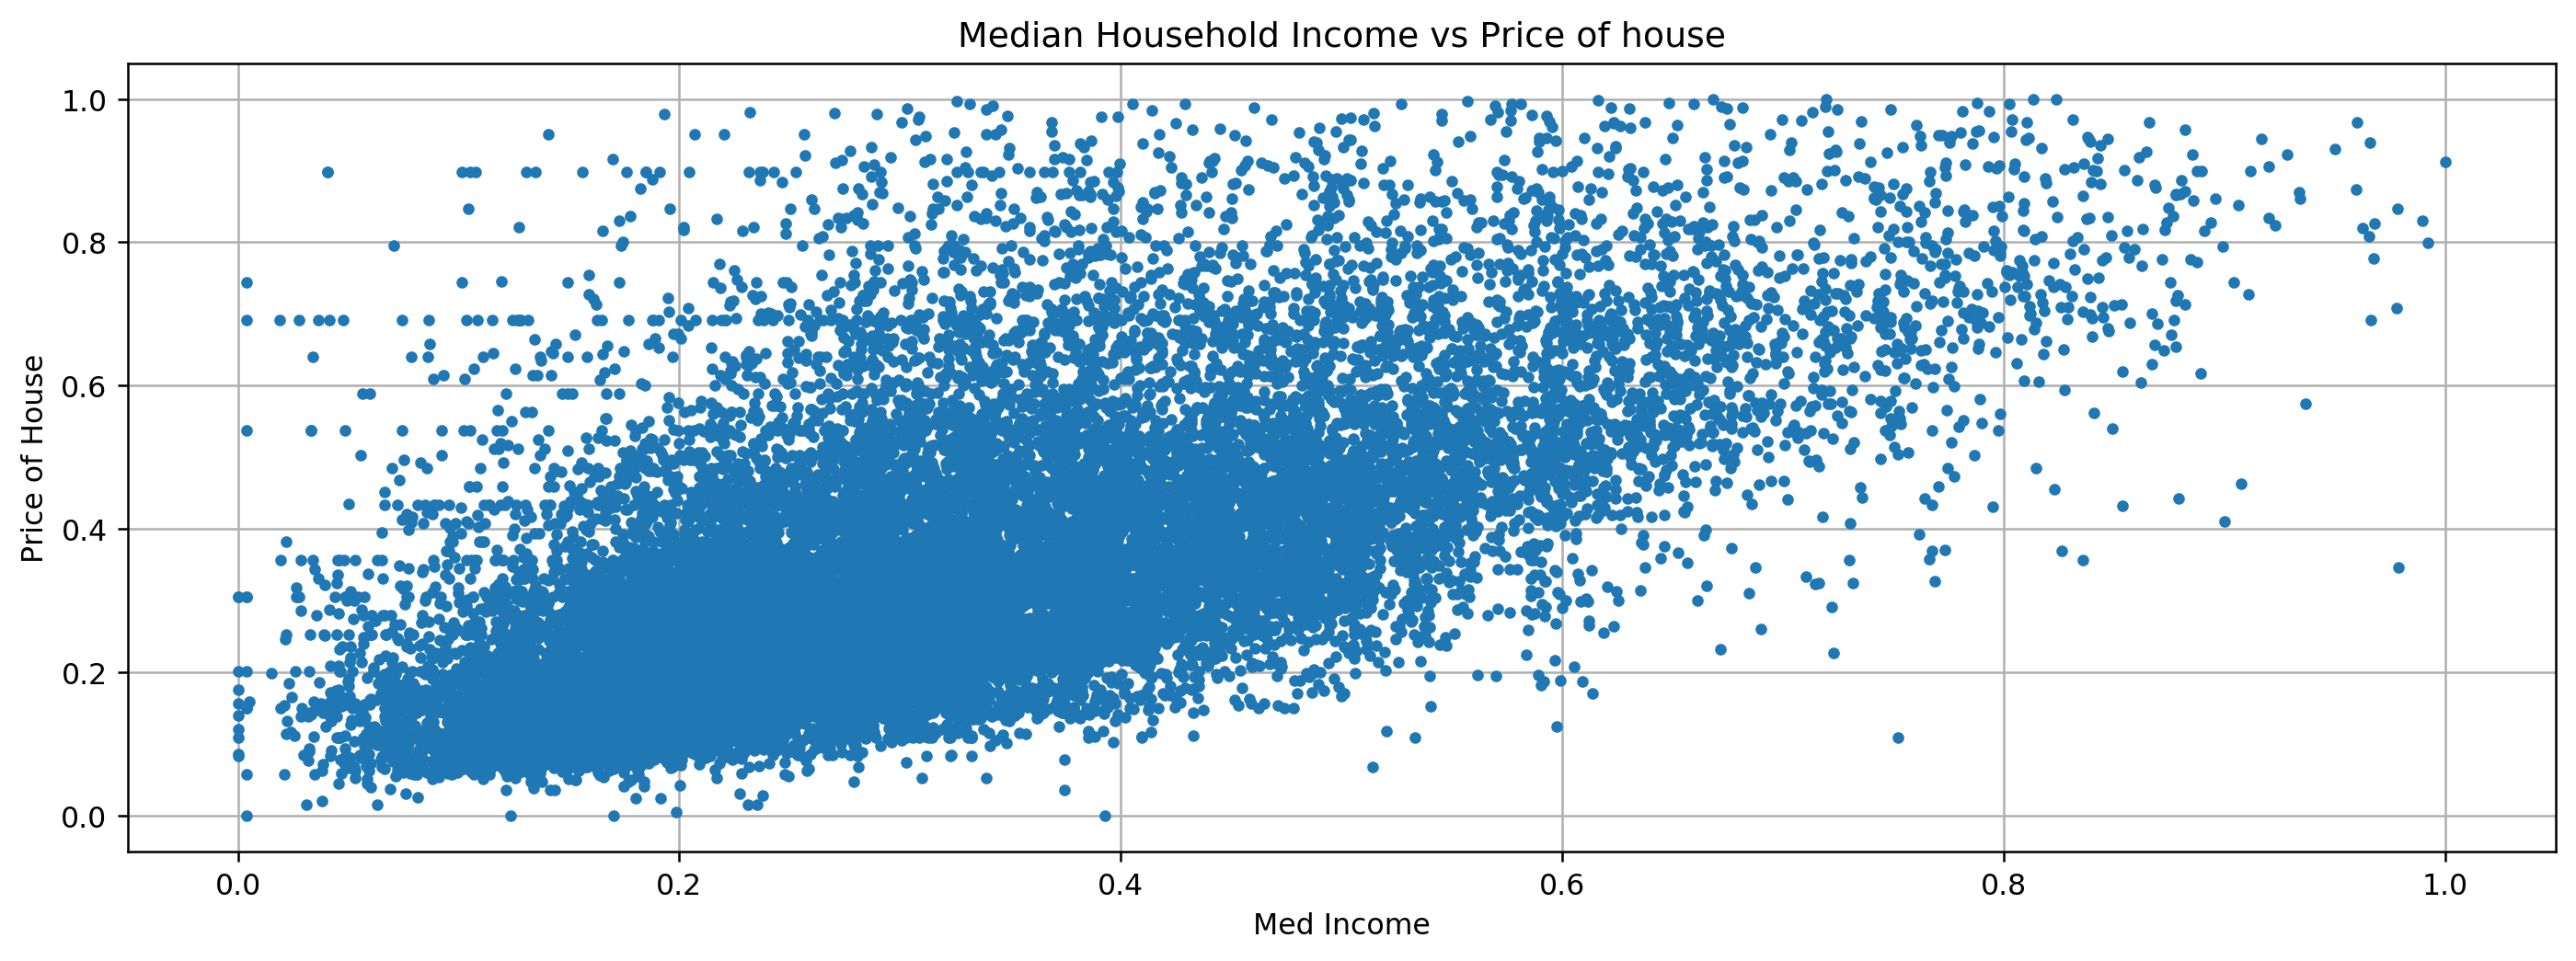

In [21]:
# I want to remove outliers. If you look at the descrepency between the 3rd quantile and the max on both columns,
# you can see the issue. We want to remove all rows where either MedInc > 5 or Target > 3 But we should look to
# see how many of these points there are
plt.figure(figsize=(15,5))

#Plotting data without connecting lines
plt.plot(df.MedInc,df.Target,'.')

#Labels and options
plt.title("Median Household Income vs Price of house")
plt.ylabel("Price of House")
plt.xlabel("Med Income")
plt.grid(True)

In [10]:
# let's ignore MedInc > 10 and Target > 5... we have that strange line at 5... I imagine this is a " > 5" data point.
df = df[df.MedInc < 10]
df = df[df.Target < 5]


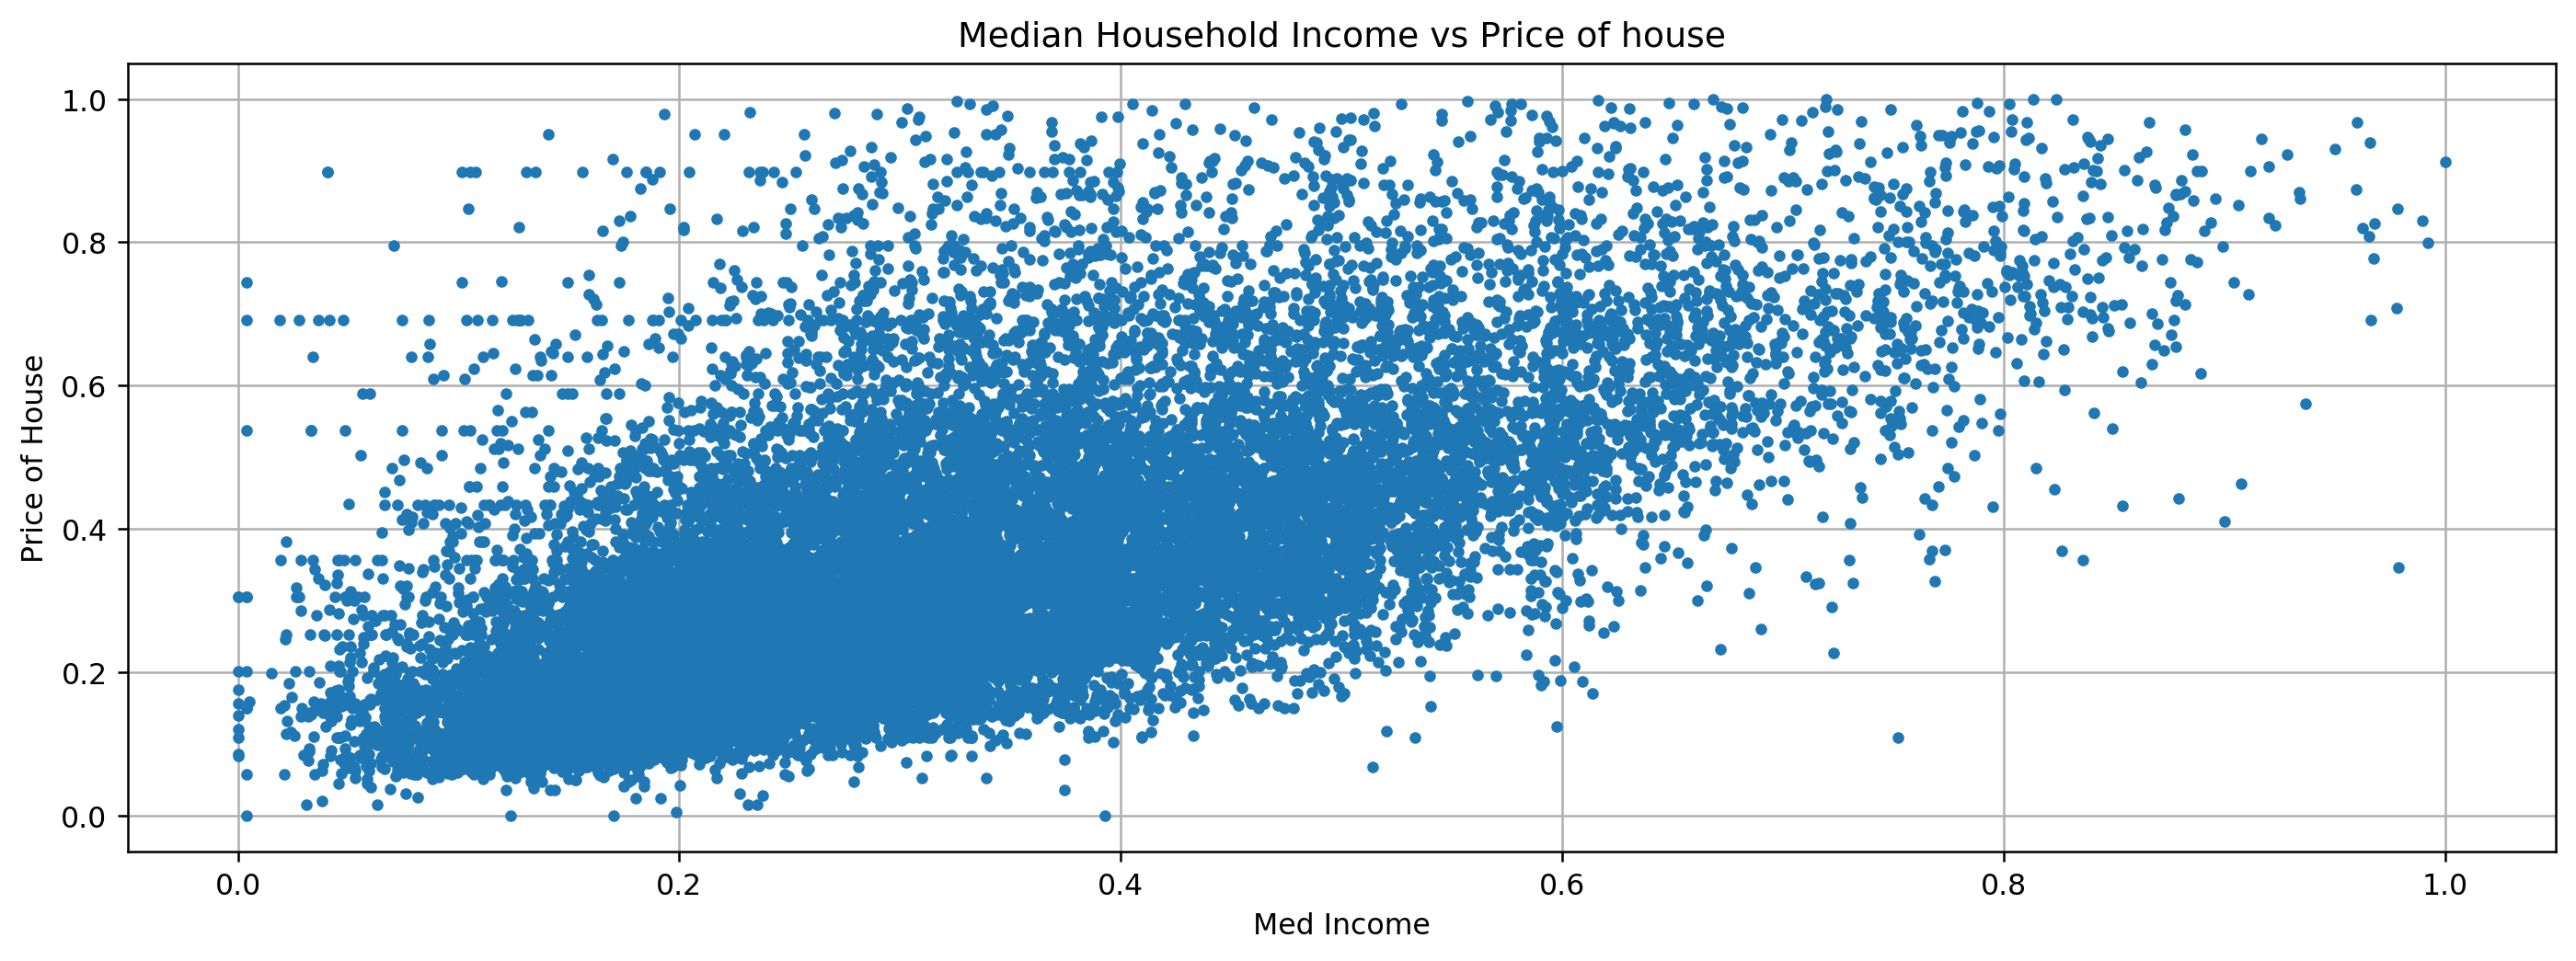

In [20]:
plt.figure(figsize=(15,5))

#Plotting data without connecting lines
plt.plot(df.MedInc,df.Target,'.')

#Labels and options
plt.title("Median Household Income vs Price of house")
plt.ylabel("Price of House")
plt.xlabel("Med Income")
plt.grid(True)

In [12]:
# now let's normalize these variables
def normalize(df,cols):
    for name in cols:
        minimum = df[name].min()
        maximum = df[name].max()
        df[name] = df[name].apply(lambda x: (x-minimum)/(maximum-minimum))
    return 0

In [13]:
normalize(df,['Target','MedInc'])

0

In [14]:
df[['MedInc','Target']].describe()

,MedInc,Target
count,19599.000000,19599.000000
mean,0.335776,0.364730
std,0.162427,0.199512
min,0.000000,0.000000
25%,0.215180,0.209256
50%,0.312877,0.327207
75%,0.432987,0.479964
max,1.000000,1.000000


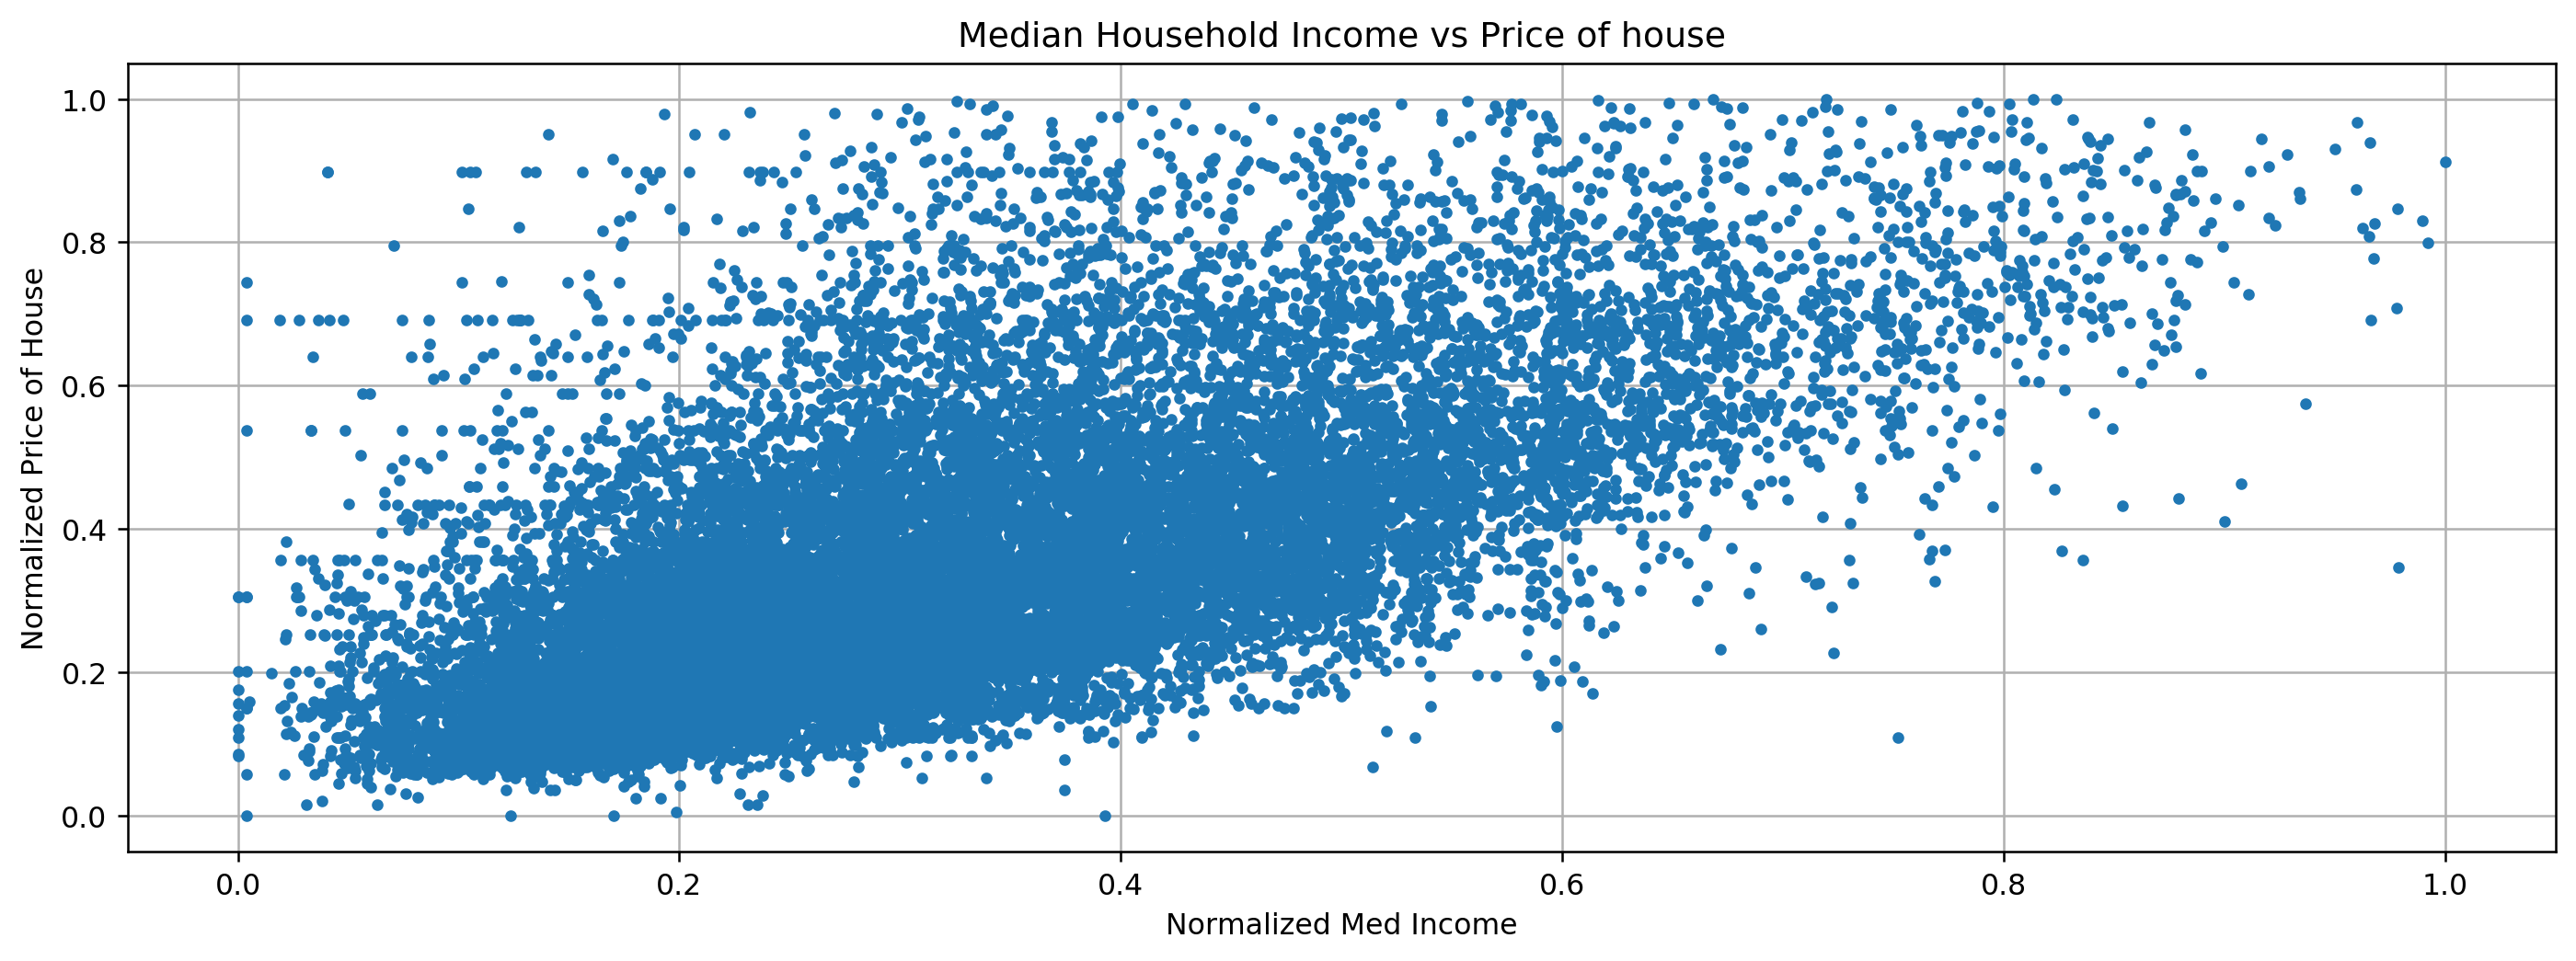

In [19]:
plt.figure(figsize=(15,5))

#Plotting data without connecting lines
plt.plot(df.MedInc,df.Target,'.')

#Labels and options
plt.title("Median Household Income vs Price of house")
plt.ylabel("Normalized Price of House")
plt.xlabel("Normalized Med Income")
plt.grid(True)

In [16]:
len(df)

19599

In [26]:
# these functions will only work for this particular dataset
def MSE(data,m,b):
    '''
    Just computes the MSE.
    '''
    data['SE'] = (m*data['MedInc']+b - data['Target'])**2
    return (1/len(data))*data['SE'].sum()

def MSE_grad(data,m,b):
    '''
    Returns the gradient MSE.
    '''
    data['m_sum'] = 2*data['MedInc']*(m*data['MedInc']+b - data['Target'])
    data['b_sum'] = 2*(m*data['MedInc']+b - data['Target'])
    new_m = (1/len(data))*data['m_sum'].sum()
    new_b = (1/len(data))*data['b_sum'].sum()
    # print("m: ", new_m, "\nb: ", new_b)
    return {'m':new_m,'b':new_b}

def Lin_regression(data,lr = 0.05, epoch = 10,m = 1, b = 0):
    '''
    This performs regression with gradient descent
    '''
    log, mse = [],[]
    for i in range(epoch):
        grad_err = MSE_grad(data,m,b)
        m -= lr*grad_err['m']
        b -= lr*grad_err['b']
        mse.append(MSE(data,m,b))
        log.append([m,b])
    return m,b,log,mse

def line(data,m,b):
    '''
    This is just the eq. of a line
    '''
    ran = np.linspace(data['MedInc'].min(),data['MedInc'].max(),1000)
    return ran, m *ran + b

def plot_regression(data, pred_m, pred_b, log=None, title="Linear Regression With Gradient Descent"):
    '''
    This plots the results as well as the steps.
    '''
    ran, regr = line(data,pred_m,pred_b)
    
    plt.figure(figsize=(16,6))
    plt.rcParams['figure.dpi'] = 227
    plt.scatter(data['MedInc'], data['Target'], label='Data', c='#388fd8', s=6)
    if log != None:
        for i in range(len(log)):
            temp_ran, temp_regr = line(data,log[i][0],log[i][1])
            plt.plot(temp_ran, temp_regr, lw=1, c='#caa727', alpha=0.3)
    plt.plot(ran, regr, c='#ff7702', lw=2, label='Regression')
    plt.title(title, fontSize=14)
    plt.xlabel('Income', fontSize=11)
    plt.ylabel('Price', fontSize=11)
    plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
    plt.tick_params(direction='out', length=6, color='#a0a0a0', width=1, grid_alpha=.6)
    plt.grid(True)
    plt.show()

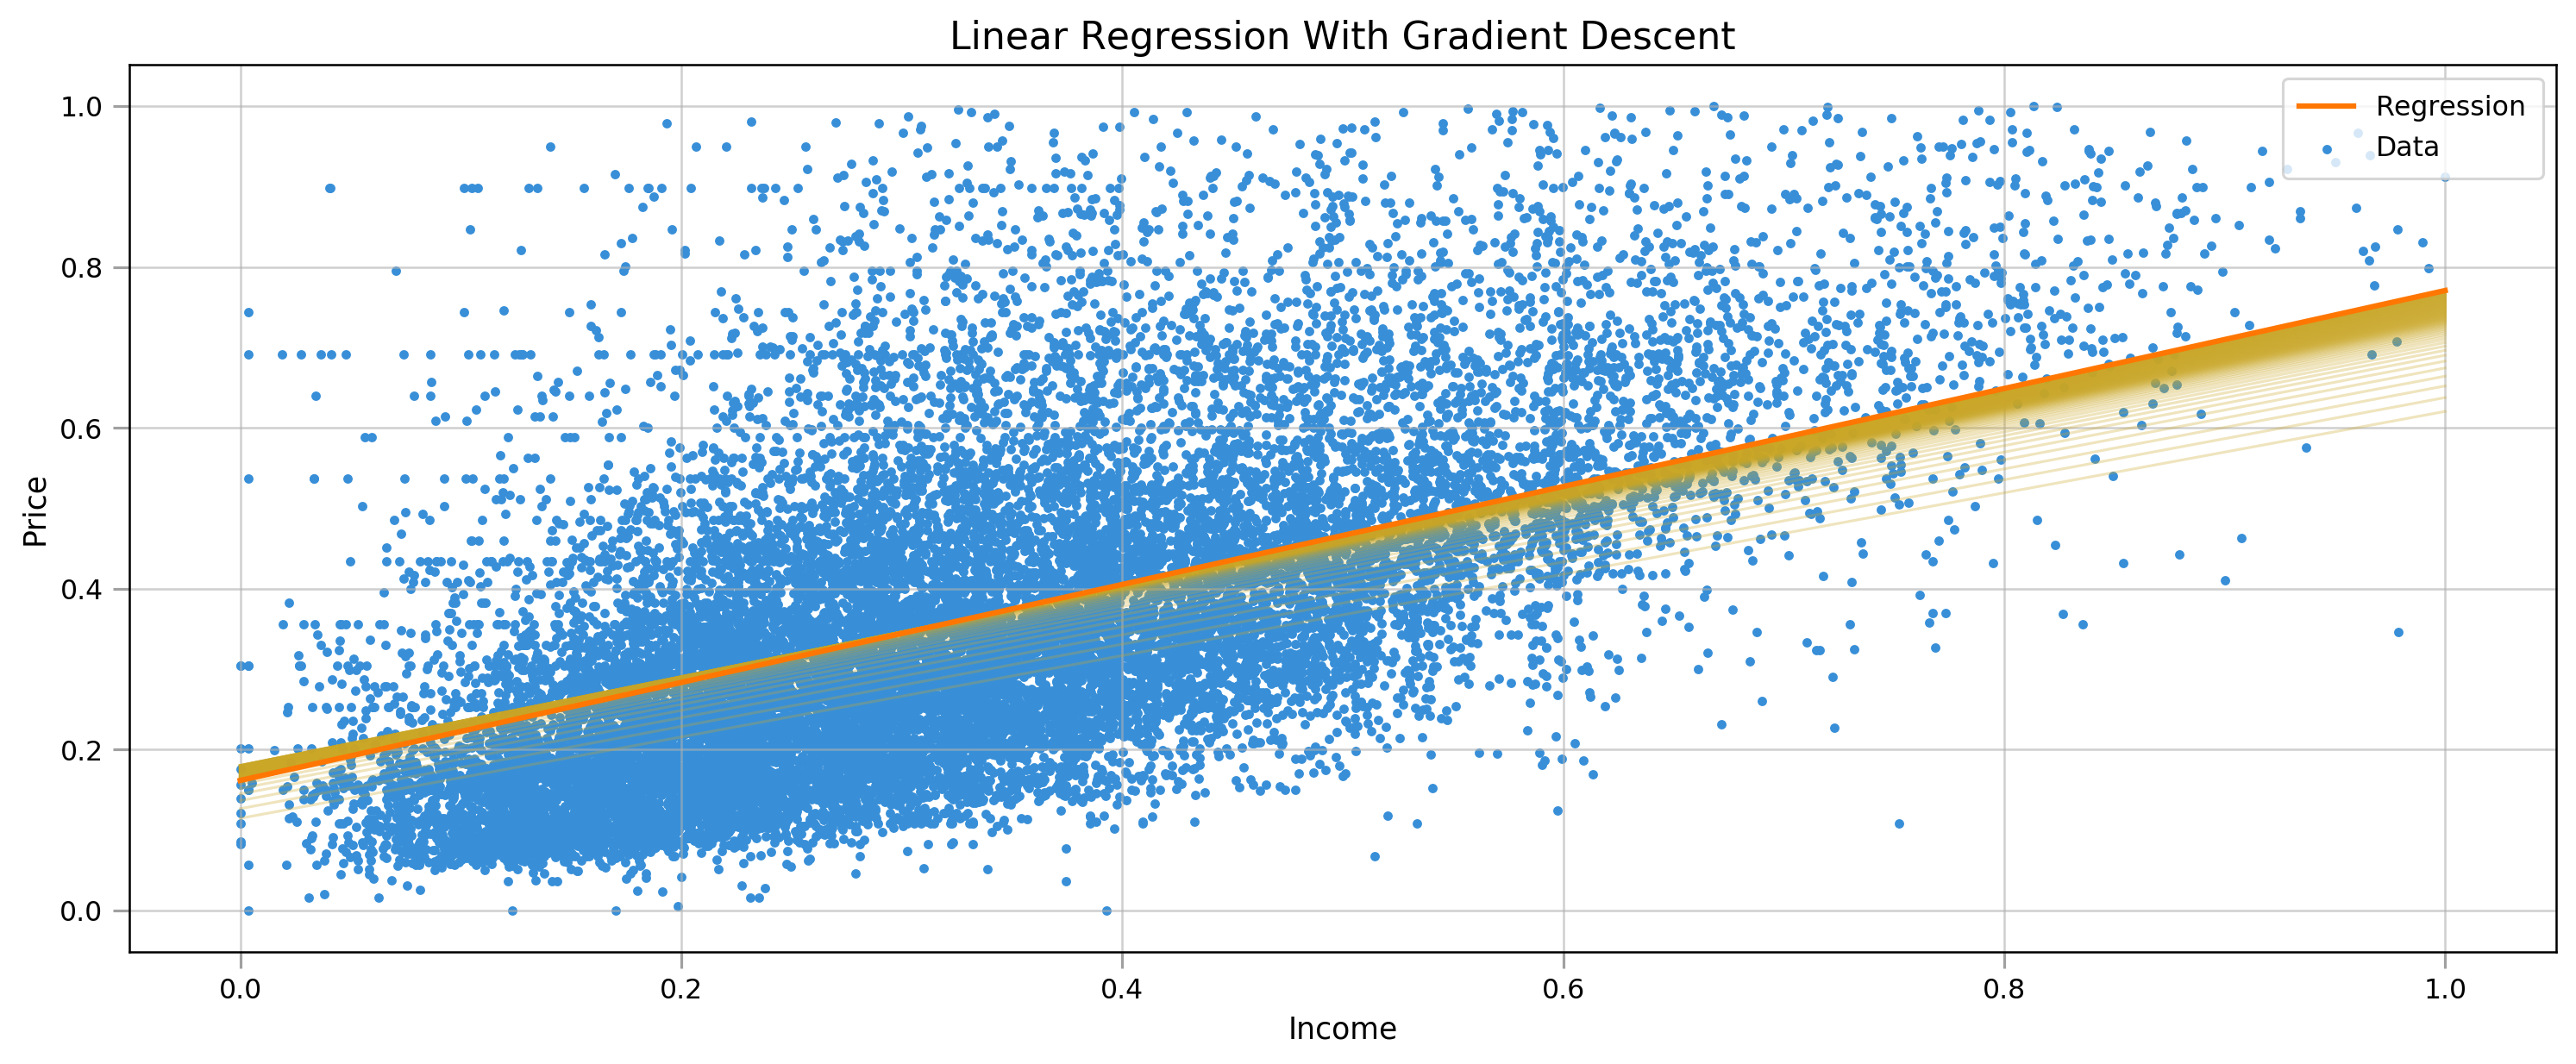

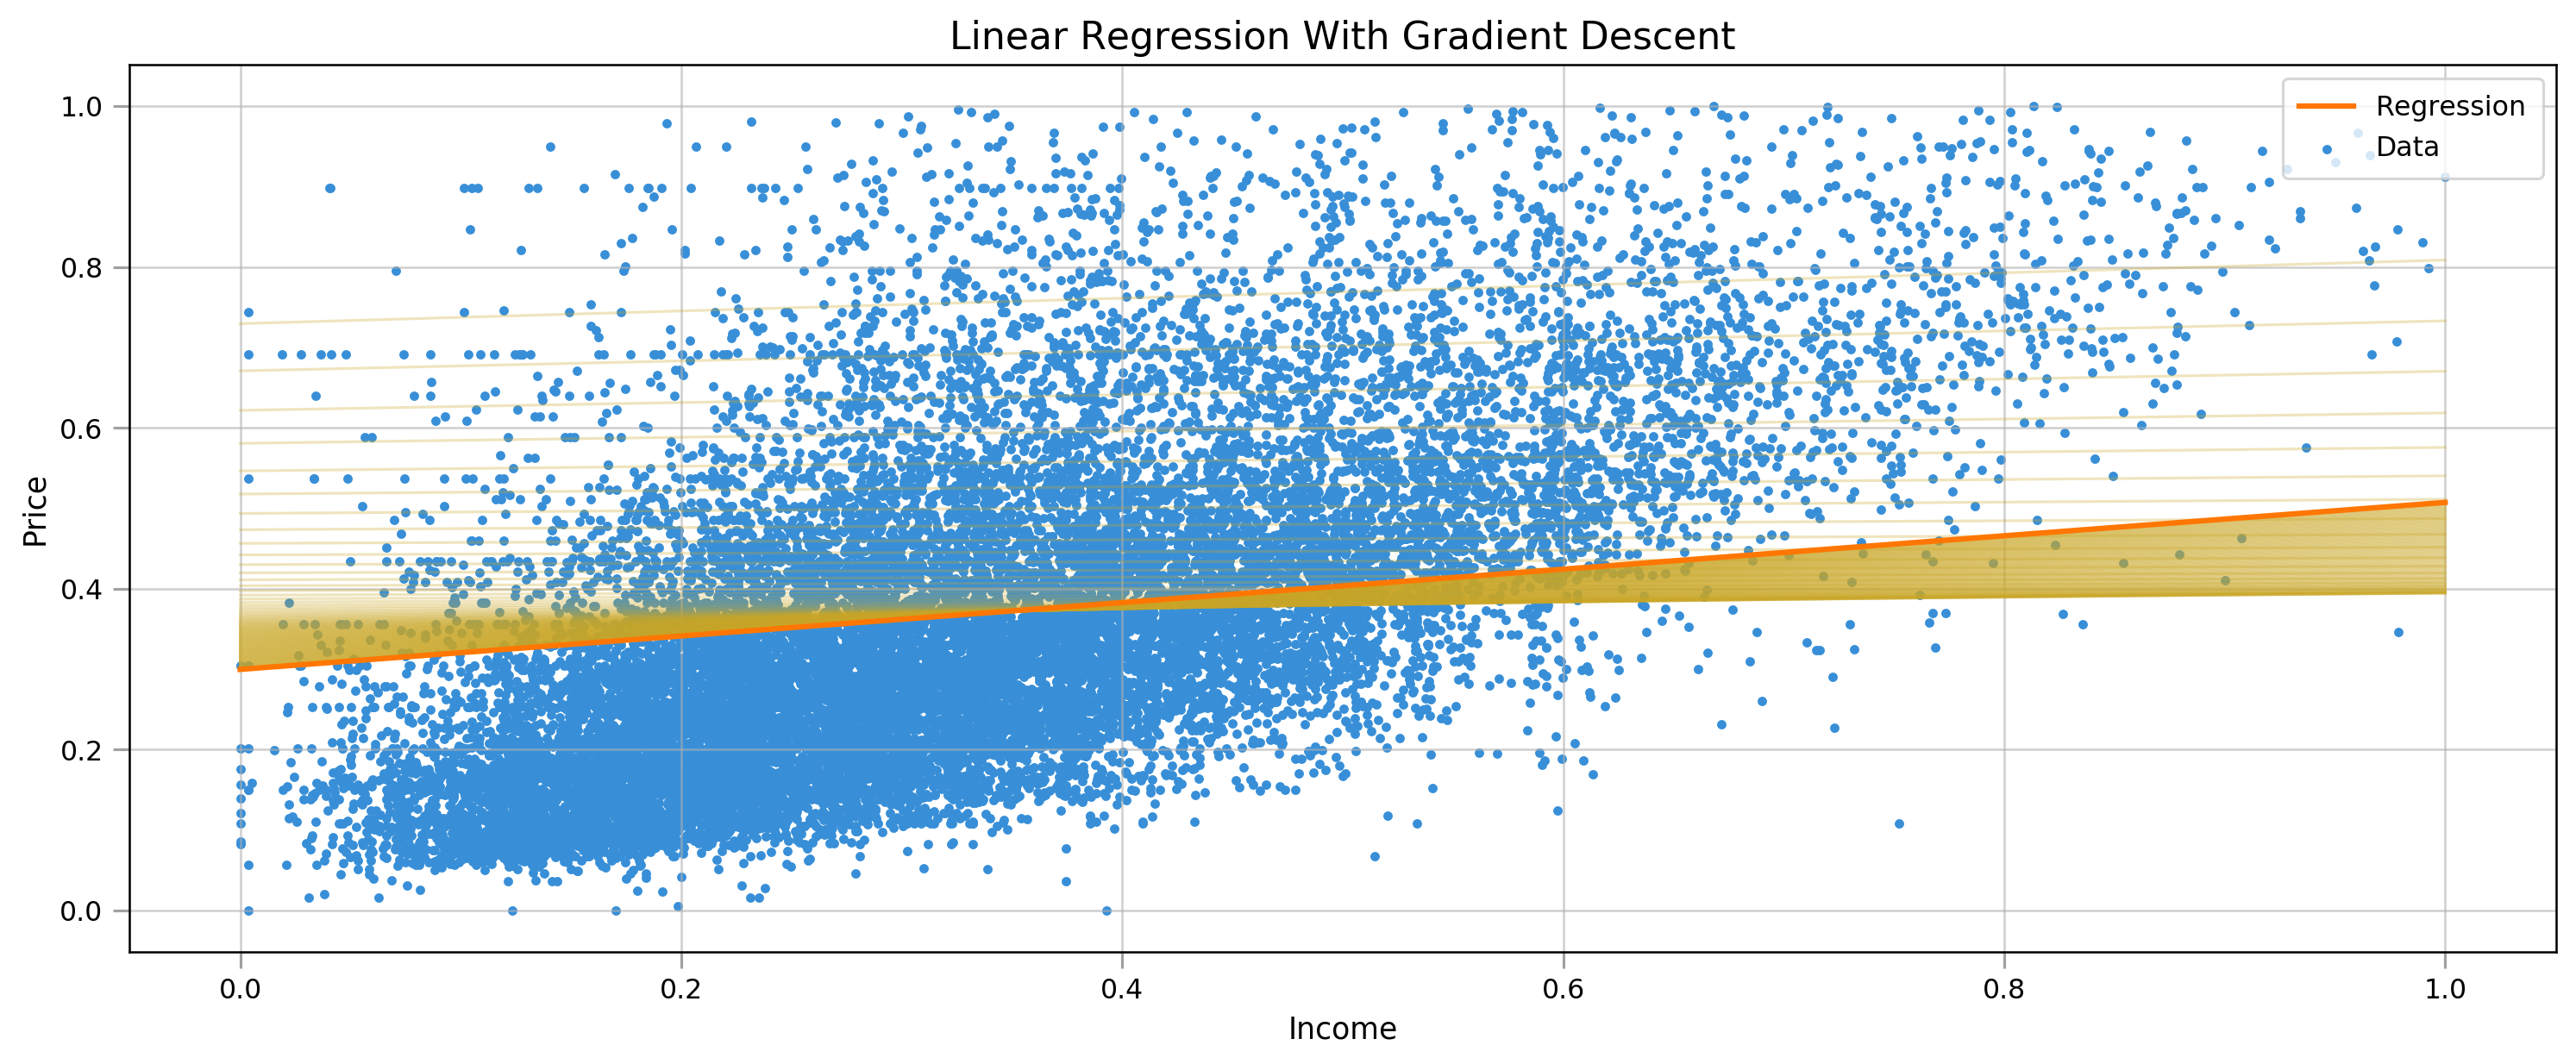

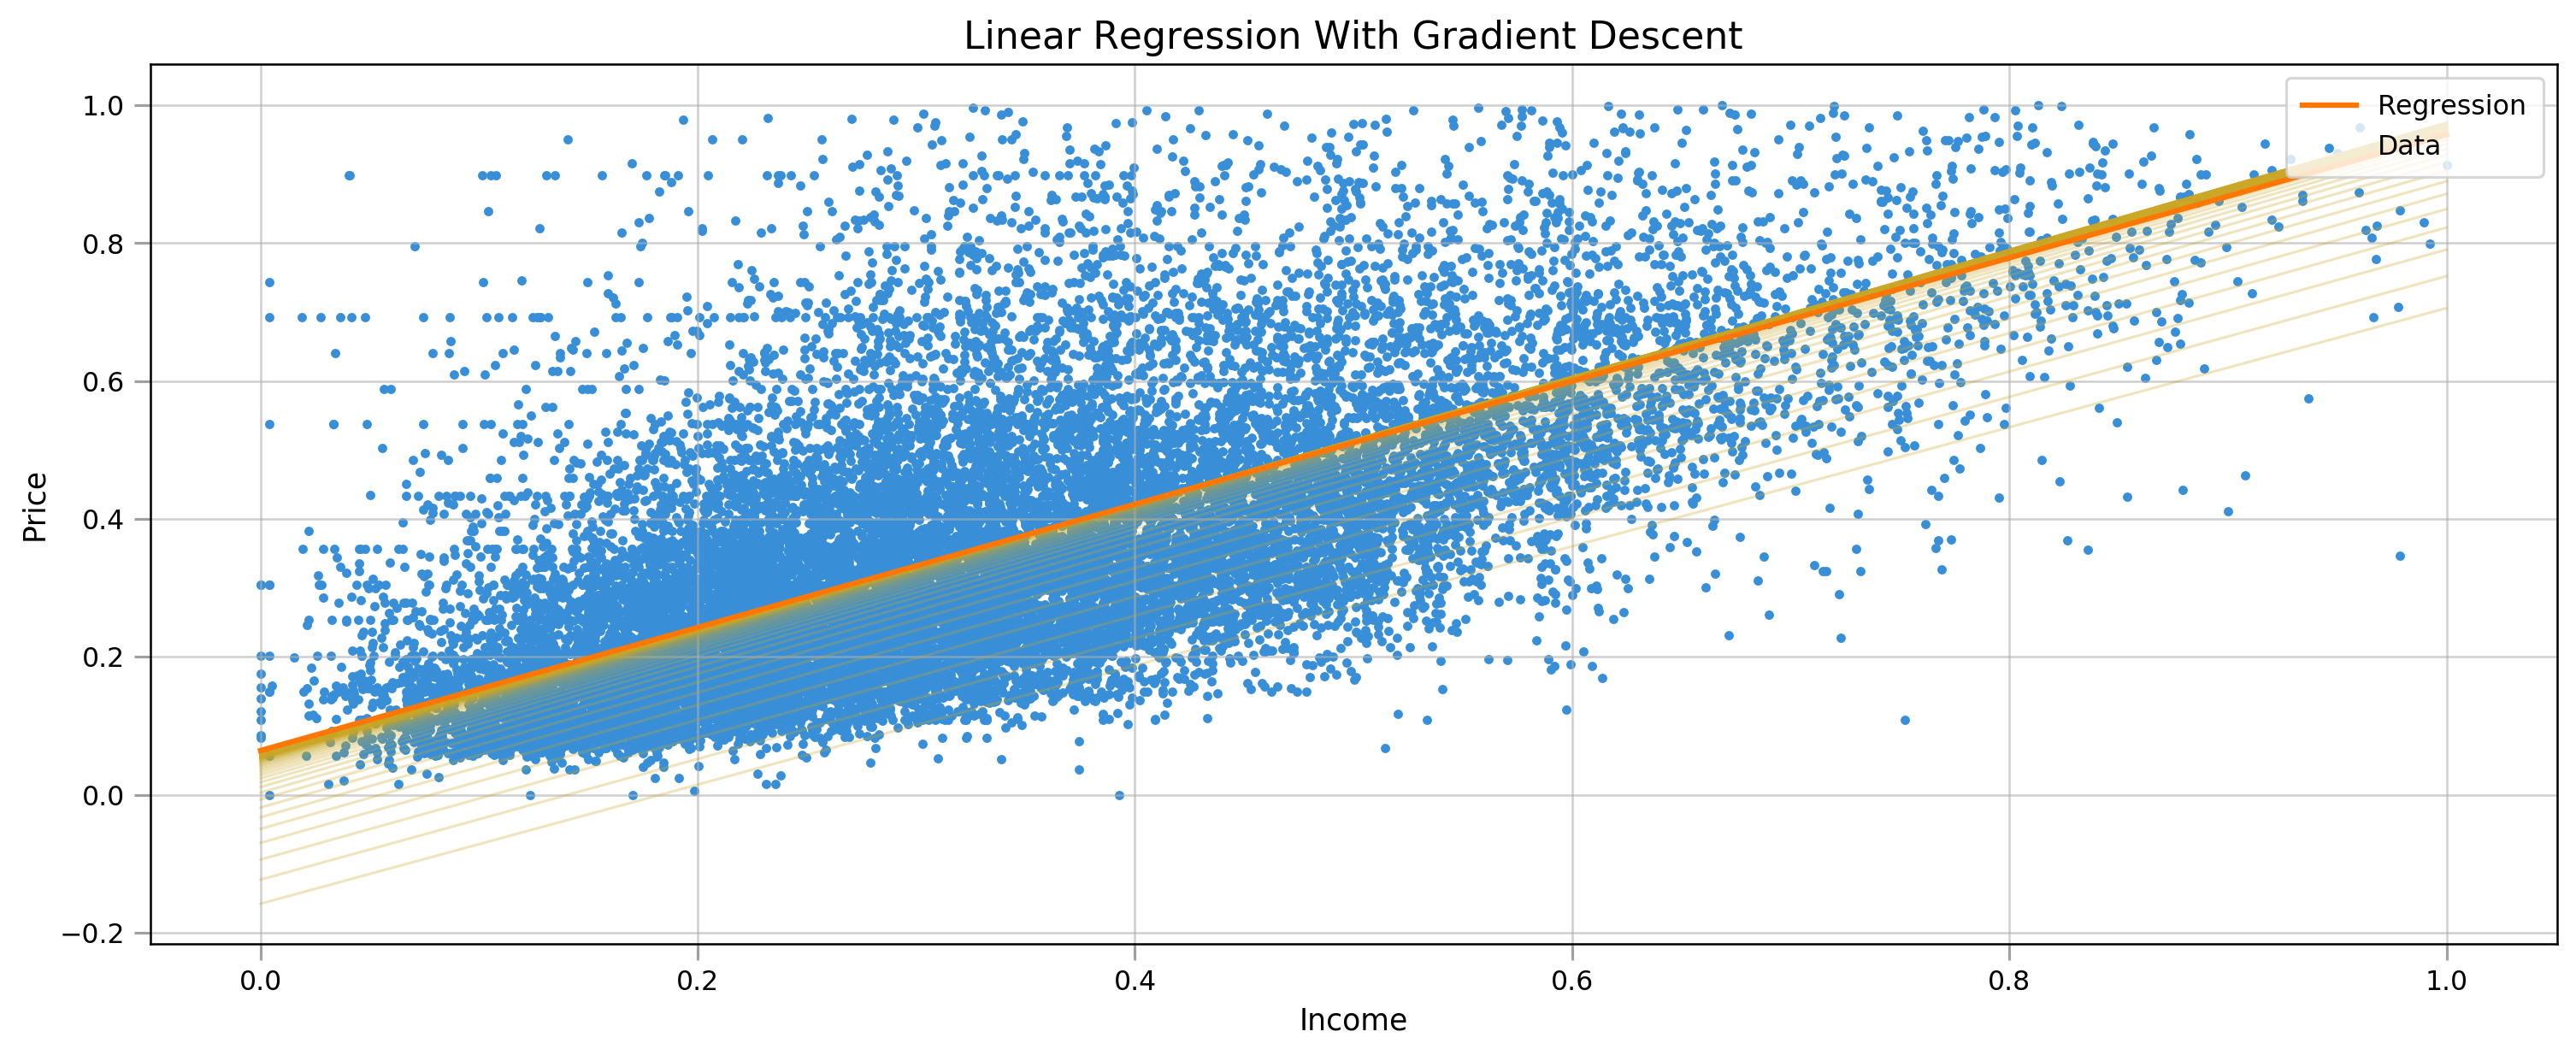

In [27]:
final_m, final_b, mb_log, error_log = Lin_regression(data = df,lr = 0.075, epoch = 100,m = 0.5, b=0.1)
plot_regression(df,final_m,final_b,log = mb_log)
final_m, final_b, mb_log, error_log = Lin_regression(data = df,lr = 0.075, epoch = 100,m = 0.1, b=0.8)
plot_regression(df,final_m,final_b,log = mb_log)
final_m, final_b, mb_log, error_log = Lin_regression(data = df,lr = 0.075, epoch = 100,m = 0.85, b=-0.2)
plot_regression(df,final_m,final_b,log = mb_log)